# Capstone Project Two (Data Wrangling)

## 1. Importing libraries and load the data

In [1]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import os
from scipy import stats

In [2]:
# Load the data
df_wrangling = pd.read_csv("BankChurners.csv")
churn_df = df_wrangling.copy()
df_wrangling.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3.0,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5.0,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3.0,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4.0,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## 2. Removing unnecessary columns and rename

In [3]:
# Delete unnecessary columns
df_wrangling = df_wrangling.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [4]:
# Rename some columns
old_names = df_wrangling.columns
new_names = ['Attrition_Flag', 'Age', 'Gender', 
        'Dependent_Count', 'Education', 'Marital_Status',
       'Income', 'Card_Category', 'Months_On_Book',
       'Total_Relationship_Count', 'Months_Inactive',
       'Contacts_Count', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
df_wrangling.rename(columns=dict(zip(old_names, new_names)), inplace=True)

## 3. Explore the dataset

In [5]:
df_wrangling.columns

Index(['Attrition_Flag', 'Age', 'Gender', 'Dependent_Count', 'Education',
       'Marital_Status', 'Income', 'Card_Category', 'Months_On_Book',
       'Total_Relationship_Count', 'Months_Inactive', 'Contacts_Count',
       'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [6]:
df_wrangling.shape

(10135, 20)

In [7]:
df_wrangling.index

RangeIndex(start=0, stop=10135, step=1)

In [8]:
# Check the dtypes
df_wrangling.dtypes

Attrition_Flag               object
Age                           int64
Gender                       object
Dependent_Count             float64
Education                    object
Marital_Status               object
Income                       object
Card_Category                object
Months_On_Book                int64
Total_Relationship_Count      int64
Months_Inactive               int64
Contacts_Count                int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

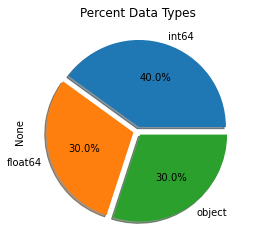

In [9]:
# data type plot
df_wrangling.dtypes.value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',shadow=True)
plt.title('Percent Data Types');

In [10]:
# cross check the datatype of 'Age' column
# df_wrangling['Age'].min()
# df_wrangling['Age'].max()
df_wrangling['Age'].mean()

46.32836704489393

## 4. Explore the summary statistics

In [11]:
# Get the summary of the data
df_wrangling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10135 entries, 0 to 10134
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10135 non-null  object 
 1   Age                       10135 non-null  int64  
 2   Gender                    10135 non-null  object 
 3   Dependent_Count           10125 non-null  float64
 4   Education                 10135 non-null  object 
 5   Marital_Status            10135 non-null  object 
 6   Income                    10135 non-null  object 
 7   Card_Category             10135 non-null  object 
 8   Months_On_Book            10135 non-null  int64  
 9   Total_Relationship_Count  10135 non-null  int64  
 10  Months_Inactive           10135 non-null  int64  
 11  Contacts_Count            10135 non-null  int64  
 12  Credit_Limit              10135 non-null  float64
 13  Total_Revolving_Bal       10135 non-null  int64  
 14  Avg_Op

In [12]:
df_wrangling.describe(include='all')

,Attrition_Flag,Age,Gender,Dependent_Count,Education,Marital_Status,Income,Card_Category,Months_On_Book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10135,10135.000000,10135,10125.000000,10135,10135,10135,10135,10135.000000,10135.000000,10135.000000,10135.000000,10135.000000,10135.000000,10135.000000,10135.000000,10135.000000,10135.000000,10135.000000,10135.000000
unique,2,NaN,3,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8507,NaN,5359,NaN,3132,4693,3561,9443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,46.328367,NaN,2.346272,NaN,NaN,NaN,NaN,35.929650,3.813024,2.341095,2.456043,8630.591130,1162.955895,7471.360839,0.759939,4401.719783,64.838185,0.712271,0.274889
std,NaN,8.018710,NaN,1.298875,NaN,NaN,NaN,NaN,7.988773,1.554315,1.010886,1.106263,9090.843559,814.752460,9091.545474,0.219286,3396.844245,23.475522,0.238256,0.275684
min,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2551.500000,379.500000,1324.500000,0.631000,2153.000000,45.000000,0.581000,0.023000
50%,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3475.000000,0.736000,3897.000000,67.000000,0.702000,0.175000
75%,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1783.500000,9862.500000,0.859000,4740.000000,81.000000,0.818000,0.503000


In [13]:
# profile = ProfileReport(df_wrangling, explorative=True)
# profile

## 5. Finding missing and duplicated values and irregularities

In [14]:
# df_wrangling.isna()
# df_wrangling.isna().any()
df_wrangling.isnull().sum()

Attrition_Flag               0
Age                          0
Gender                       0
Dependent_Count             10
Education                    0
Marital_Status               0
Income                       0
Card_Category                0
Months_On_Book               0
Total_Relationship_Count     0
Months_Inactive              0
Contacts_Count               0
Credit_Limit                 0
Total_Revolving_Bal          0
Avg_Open_To_Buy              0
Total_Amt_Chng_Q4_Q1         0
Total_Trans_Amt              0
Total_Trans_Ct               0
Total_Ct_Chng_Q4_Q1          0
Avg_Utilization_Ratio        0
dtype: int64

In [15]:
df_wrangling['Dependent_Count'].fillna(df_wrangling['Dependent_Count'].median(), inplace=True)
df_wrangling.isnull().sum()

Attrition_Flag              0
Age                         0
Gender                      0
Dependent_Count             0
Education                   0
Marital_Status              0
Income                      0
Card_Category               0
Months_On_Book              0
Total_Relationship_Count    0
Months_Inactive             0
Contacts_Count              0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### 1. Drop duplicated values

In [16]:
# Drop duplicate row
df_wrangling.drop_duplicates(inplace=True)
print(df_wrangling[df_wrangling.duplicated()])

Empty DataFrame
Columns: [Attrition_Flag, Age, Gender, Dependent_Count, Education, Marital_Status, Income, Card_Category, Months_On_Book, Total_Relationship_Count, Months_Inactive, Contacts_Count, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []


### 2. Finding and correcting irregularities of individual attributes

In [17]:
# df.columns = df.columns.str.strip()

In [18]:
# df['gender'].value_counts(normalize=True) * 100
df_wrangling['Attrition_Flag'].value_counts(normalize=True) * 100

Existing Customer    83.93721
Attrited Customer    16.06279
Name: Attrition_Flag, dtype: float64

In [19]:
# Number of Unique values of our categorical columns
df_wrangling['Attrition_Flag'].value_counts().head()

Existing Customer    8502
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [20]:
df_wrangling['Gender'].value_counts().head()

F    5358
M    4768
U       3
Name: Gender, dtype: int64

In [21]:
df_wrangling.loc[churn_df['Gender']=='U']

,Attrition_Flag,Age,Gender,Dependent_Count,Education,Marital_Status,Income,Card_Category,Months_On_Book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8,Existing Customer,37,U,3.0,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
293,Existing Customer,48,U,2.0,Graduate,Unknown,$40K - $60K,Blue,36,5,1,2,13068.0,1718,11350.0,0.607,937,28,0.556,0.131
569,Existing Customer,43,U,2.0,Uneducated,Divorced,$120K +,Silver,24,4,2,0,34516.0,1938,32578.0,0.426,1215,45,0.406,0.056


In [22]:
df_wrangling.shape

(10129, 20)

In [23]:
df_wrangling = df_wrangling.loc[churn_df['Gender']!='U']

In [24]:
churn_df.shape

(10135, 23)

In [25]:
# df_wrangling['Income'].nunique()
df_wrangling['Income'].value_counts()

Less than $40K    3561
$40K - $60K       1789
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income, dtype: int64

In [26]:
# df_wrangling['Age'].unique()
# df_wrangling['Age'].nunique()
df_wrangling['Age'].value_counts().head()

44    500
49    495
46    490
45    486
47    479
Name: Age, dtype: int64

In [27]:
# df_wrangling['Marital_Status'].nunique()
# df_wrangling['Marital_Status'].unique()
df_wrangling['Marital_Status'].value_counts().head()

Married     4689
Single      3942
Unknown      748
Divorced     747
Name: Marital_Status, dtype: int64

In [28]:
df_wrangling.groupby('Marital_Status').count()

,Attrition_Flag,Age,Gender,Dependent_Count,Education,Income,Card_Category,Months_On_Book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Marital_Status,,,,,,,,,,,,,,,,,,,
Divorced,747,747,747,747,747,747,747,747,747,747,747,747,747,747,747,747,747,747,747
Married,4689,4689,4689,4689,4689,4689,4689,4689,4689,4689,4689,4689,4689,4689,4689,4689,4689,4689,4689
Single,3942,3942,3942,3942,3942,3942,3942,3942,3942,3942,3942,3942,3942,3942,3942,3942,3942,3942,3942
Unknown,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748


In [29]:
# df_wrangling['Education'].unique()
# df_wrangling['Education'].nunique()
df_wrangling['Education'].value_counts().head()
df_wrangling['Education'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [30]:
# Inspecting specific countries data
df_wrangling[df_wrangling['Attrition_Flag']=='Attrited Customer'].sum()

Attrition_Flag              Attrited CustomerAttrited CustomerAttrited Cus...
Age                                                                     75915
Gender                      FFFMMFMMFMFMMMFMFMFMFMMFFMFMFMMMMMMFFMFFFMMMFM...
Dependent_Count                                                          3909
Education                   GraduateDoctorateGraduateGraduateGraduateUnkno...
Marital_Status              MarriedMarriedMarriedMarriedMarriedMarriedMarr...
Income                      Less than $40KUnknownLess than $40K$120K +$60K...
Card_Category               BlueBlueBlueBlueSilverBlueBlueBlueBlueBlueBlue...
Months_On_Book                                                          58862
Total_Relationship_Count                                                 5336
Months_Inactive                                                          4382
Contacts_Count                                                           4836
Credit_Limit                                                    

In [31]:
# Finding no. of irrelevant credit limits of 0 dollar
df_wrangling.loc[df_wrangling['Credit_Limit']<500, 'Credit_Limit'].value_counts()

0.0    6
Name: Credit_Limit, dtype: int64

In [32]:
# Finding irrelevant rows of credit limits of 0 dollar
df_wrangling.loc[df_wrangling['Credit_Limit']<500, 'Credit_Limit']

9149     0.0
9320     0.0
9492     0.0
9705     0.0
10129    0.0
10131    0.0
Name: Credit_Limit, dtype: float64

In [33]:
df_wrangling.shape

(10126, 20)

In [34]:
# dropping particular rows containing 0 credit limit
df_wrangling = df_wrangling.loc[df_wrangling['Credit_Limit']>500]

In [35]:
df_wrangling.shape

(10120, 20)

In [36]:
df_wrangling.duplicated().sum()

0

## 6. Finding numerical and categorical columns

In [37]:
# Check out the numerical columns
df_wrangling.select_dtypes(include=np.number)

,Age,Dependent_Count,Months_On_Book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5.0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3.0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4.0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3.0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2.0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2.0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1.0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2.0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [38]:
# Check out the categorical columns
df_wrangling.select_dtypes('object')
df_wrangling['Card_Category'].value_counts()

Blue        9430
Silver       554
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [39]:
df_wrangling.loc[df_wrangling['Attrition_Flag']=='Attrited Customer', ['Marital_Status','Income','Education', 'Card_Category']].head(20)

,Marital_Status,Income,Education,Card_Category
21,Married,Less than $40K,Graduate,Blue
39,Married,Unknown,Doctorate,Blue
51,Married,Less than $40K,Graduate,Blue
54,Married,$120K +,Graduate,Blue
61,Married,$60K - $80K,Graduate,Silver
82,Married,$40K - $60K,Unknown,Blue
99,Married,$80K - $120K,Unknown,Blue
127,Married,$80K - $120K,Graduate,Blue
140,Married,Less than $40K,High School,Blue
144,Single,$60K - $80K,College,Blue


In [40]:
# Groupby function is not working
# churn_df.reset_index()
df_wrangling.groupby(by='Attrition_Flag').sum().T

Attrition_Flag,Attrited Customer,Existing Customer
Age,7.581800e+04,3.929920e+05
Dependent_Count,3.904000e+03,1.983600e+04
Months_On_Book,5.877800e+04,3.048090e+05
Total_Relationship_Count,5.331000e+03,3.325600e+04
Months_Inactive,4.377000e+03,1.931900e+04
Contacts_Count,4.828000e+03,2.002300e+04
Credit_Limit,1.322983e+07,7.410027e+07
Total_Revolving_Bal,1.091667e+06,1.067018e+07
Avg_Open_To_Buy,1.213816e+07,6.343009e+07
Total_Amt_Chng_Q4_Q1,1.128236e+03,6.560599e+03


## 7. Visualizing correlations and outliers of individual columns

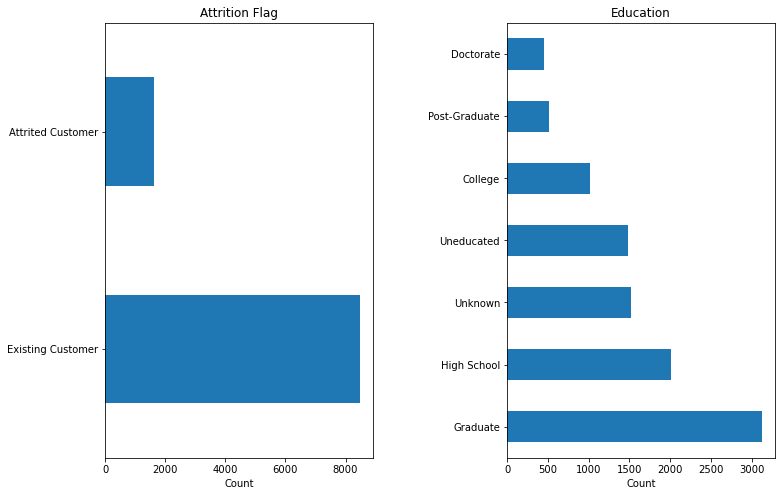

In [41]:
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df_wrangling.Attrition_Flag.value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('Attrition Flag')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df_wrangling.Education.value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('Education')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);
#You're encouraged to explore a few different figure sizes, orientations, and spacing here
# as the importance of easy-to-read and informative figures is frequently understated
# and you will find the ability to tweak figures invaluable later on

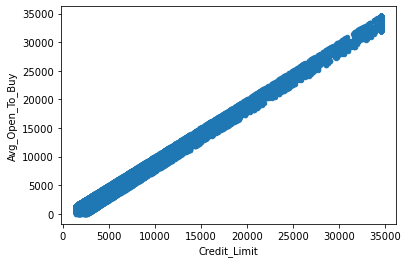

In [42]:
# Finding coorelation between Credit_Limit and Avg_Open_To_Buy columns
corr = df_wrangling[['Credit_Limit','Avg_Open_To_Buy']]
corr.plot(kind='scatter', x='Credit_Limit', y='Avg_Open_To_Buy')
plt.show()

I have found a positive coorelation between 'Credit_Limit' and 'Avg_Open_to_Buy' columns of our dataframe. Since the coorelation is universal and true, because, the more the credit limit the more amount balance the customer will have open to spend. This coorelation will not affect our exploration and modeling.

In [43]:
# filter the numeric columns from the dataframe
# df_wrangling.select_dtypes(include=np.number)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_wrangling.select_dtypes(include=numerics)

,Age,Dependent_Count,Months_On_Book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5.0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3.0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4.0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3.0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2.0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2.0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1.0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2.0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


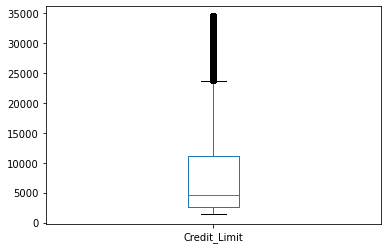

In [44]:
# Checking Outliers for Credit_Limit column
df_wrangling.Credit_Limit.plot(kind='box')
plt.show()

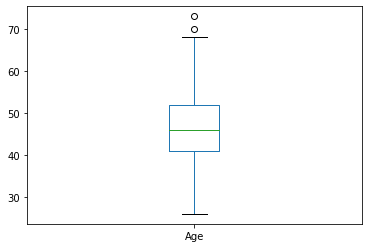

In [45]:
# Checking Outliers for Age column
df_wrangling.Age.plot(kind='box')
plt.show()

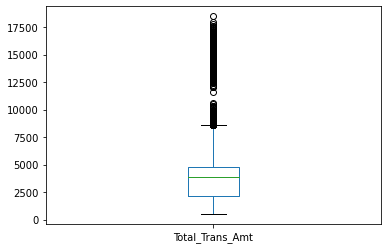

In [46]:
# Checking Outliers for Total_trans_Amt column
df_wrangling.Total_Trans_Amt.plot(kind='box')
plt.show()

In [47]:
# churn_df.Credit_Limit.max()
df_wrangling.Credit_Limit.quantile(q=0.75)

11063.25

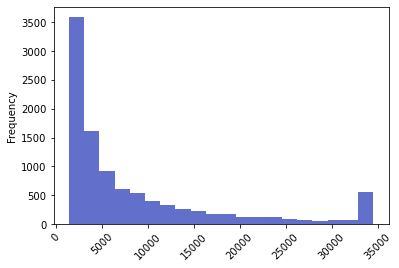

In [48]:
df_wrangling['Credit_Limit'].plot(kind='hist',bins=20, rot=45, colormap='coolwarm',alpha=0.8)
plt.show()

In [49]:
# Discarding outliers from dataframe
"""
# z_scores = stats.zscore(df)
def drop_outliers(df, col_name):
    abs_z_scores = np.abs(stats.zscore(df[col_name]))
    filtered_entries = (abs_z_scores < 3)
    new_df = df[filtered_entries]
    return new_df
new_churn = drop_outliers(churn_df, 'Avg_Open_To_Buy')
new_churn.shape
"""
"""
# Drop all outliers from numerical columns
from scipy import stats

def drop_numerical_outliers(df1, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df1.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df1.drop(df1.index[~constrains], inplace=True)
    return df1
final_df = drop_numerical_outliers(churn_df)
"""

'\n# Drop all outliers from numerical columns\nfrom scipy import stats\n\ndef drop_numerical_outliers(df1, z_thresh=3):\n    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.\n    constrains = df1.select_dtypes(include=[np.number])         .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh)         .all(axis=1)\n    # Drop (inplace) values set to be rejected\n    df1.drop(df1.index[~constrains], inplace=True)\n    return df1\nfinal_df = drop_numerical_outliers(churn_df)\n'

## 8. Save data

In [50]:
# save the churn_df dataframe to drive.
df_wrangling.to_csv('df_EDA.csv')